In [264]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#import data analysis tools
import matplotlib.pyplot as plt

#Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

# Get Data

In [14]:
data = pd.read_csv("cleaned.csv", index_col = 0)
data

,AcresBurned,Counties,Latitude,Longitude,Started,FIPS,Temp Day One,Temp Day Two,Temp Day Three,Temp Day Four,Temp Day Five,MaxTemp Day One,MaxTemp Day Two,MaxTemp Day Three,MaxTemp Day Four,MaxTemp Day Five,MinTemp Day One,MinTemp Day Two,MinTemp Day Three,MinTemp Day Four,MinTemp Day Five,Humidity Day One,Humidity Day Two,Humidity Day Three,Humidity Day Four,Humidity Day Five,Fire
0,257314.0,Tuolumne,37.857000,-120.086000,2013-08-17 15:25:00,6109.0,74.0,78.0,79.0,79.0,80.0,83.0,87.0,88.0,88.0,89.0,50.0,52.0,52.0,52.0,54.0,38.000,33.000,34.000,35.125,33.000,True
1,30274.0,Los Angeles,34.585595,-118.423176,2013-05-30 15:28:00,6037.0,72.0,72.0,75.0,73.0,78.0,82.0,82.0,86.0,83.0,87.0,42.0,43.0,45.0,46.0,47.0,46.000,46.500,40.625,53.875,39.625,True
2,27531.0,Riverside,33.709500,-116.728850,2013-07-15 13:43:00,6065.0,82.0,77.0,79.0,82.0,84.0,88.0,82.0,84.0,88.0,90.0,66.0,65.0,65.0,66.0,68.0,34.750,51.375,48.375,27.875,27.000,True
3,27440.0,Placer,39.120000,-120.650000,2013-08-10 16:30:00,6061.0,74.0,73.0,68.0,67.0,67.0,85.0,83.0,77.0,77.0,78.0,45.0,44.0,45.0,41.0,40.0,44.625,42.750,53.125,56.250,53.000,True
4,22992.0,Fresno,37.279000,-119.318000,2013-07-22 22:15:00,6019.0,68.0,71.0,74.0,75.0,74.0,76.0,80.0,82.0,84.0,82.0,46.0,52.0,55.0,57.0,54.0,29.375,28.125,27.250,25.000,34.000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.0,Riverside,33.827979,-117.499619,2018-10-10 12:08:00,6065.0,70.0,69.0,77.0,65.0,71.0,74.0,74.0,85.0,67.0,78.0,63.0,63.0,69.0,64.0,64.0,59.500,56.375,48.625,73.750,64.875,False
2942,0.0,Nevada,39.409722,-121.000556,2018-06-28 15:03:04,6057.0,73.0,79.0,87.0,86.0,84.0,79.0,86.0,96.0,93.0,90.0,57.0,58.0,67.0,69.0,66.0,39.250,37.875,27.250,27.375,33.500,False
2943,0.0,Yolo,38.734634,-121.729691,2018-11-25 12:02:02,6113.0,58.0,58.0,55.0,59.0,55.0,64.0,64.0,57.0,63.0,57.0,50.0,50.0,51.0,53.0,51.0,64.250,63.625,86.000,83.875,82.875,False
2944,0.0,San Diego,33.351145,-117.403719,2018-10-22 19:20:44,6073.0,67.0,68.0,71.0,71.0,77.0,72.0,73.0,75.0,76.0,82.0,60.0,60.0,58.0,62.0,65.0,76.625,79.125,79.000,74.500,58.750,False


In [15]:
data = data.replace({
    'Fire' : {
        True : 1,
        False : 0
    }
})

In [136]:
all_features = list(data.columns)[6:21] + list(data.columns)[21:-1]
target = ['Fire']
all_features


['Temp Day One',
 'Temp Day Two',
 'Temp Day Three',
 'Temp Day Four',
 'Temp Day Five',
 'MaxTemp Day One',
 'MaxTemp Day Two',
 'MaxTemp Day Three',
 'MaxTemp Day Four',
 'MaxTemp Day Five',
 'MinTemp Day One',
 'MinTemp Day Two',
 'MinTemp Day Three',
 'MinTemp Day Four',
 'MinTemp Day Five',
 'Humidity Day One',
 'Humidity Day Two',
 'Humidity Day Three',
 'Humidity Day Four',
 'Humidity Day Five',
 'Fire',
 'tmp avg',
 'tmpMax avg',
 'tmpMin avg',
 'hum avg',
 'Counties_is_missing',
 'Started_is_missing',
 'AcresBurned_is_missing']

# Model Training



In [17]:
class ModelsClass:
  def __init__(self, X, y):
    self.X = data[X].values
    self.y = data[y].values
    print(X)

  def logisticReg(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.33)

    logreg = LogisticRegression(random_state=20191016, solver='lbfgs', max_iter= 1000)

    logreg.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, logreg)

  def logisticRegNormal(self):
    scaler = StandardScaler()
    scaled_train_features = scaler.fit_transform(self.X)

    X_train, X_test, y_train, y_test = train_test_split(scaled_train_features, self.y, test_size=0.33)

    logreg = LogisticRegression(random_state=20191016, solver='lbfgs', max_iter= 1000)

    logreg.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, logreg)
  
  def RandomForest(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.33)

    random = RandomForestClassifier()

    random.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, random)

  def svc(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.33)

    svc = SVC()

    svc.fit(X_train, y_train.ravel())
    self.score(X_test, y_test, svc)

  def score(self, a, b, model):
    j = 0.000
    for i in range(50):
      j += model.score(a, b)
    j = j / 50
    print("The average score after running 50 times is : {avg:.2f}%".format(avg = (j * 100)))

In [18]:
a = ModelsClass(all_features, target)

['Temp Day One', 'Temp Day Two', 'Temp Day Three', 'Temp Day Four', 'Temp Day Five', 'MaxTemp Day One', 'MaxTemp Day Two', 'MaxTemp Day Three', 'MaxTemp Day Four', 'MaxTemp Day Five', 'MinTemp Day One', 'MinTemp Day Two', 'MinTemp Day Three', 'MinTemp Day Four', 'MinTemp Day Five', 'Humidity Day One', 'Humidity Day Two', 'Humidity Day Three', 'Humidity Day Four', 'Humidity Day Five']


In [19]:
a.logisticReg()

The average score after running 50 times is : 57.97%


*Let's try normalizing the data and see if the accuracy changes.*

In [20]:
a.logisticRegNormal()

The average score after running 50 times is : 57.45%


**The accuracy seems to be the same. So let's maybe try a different model and see the result**

*Random Forest Classifier*

In [21]:
a.RandomForest()

The average score after running 50 times is : 58.27%


*Support Vector Classifier*

In [22]:
a.svc()

The average score after running 50 times is : 57.97%


**The accuracy did not change even when we tried different models. This means that we need to modify our features.** \\
*Note that if we increase the training dataset size the accuracy of models like the SVC does increase*

## Approach #1

*Instead of using all the value of the features let us look at the averages.*

In [23]:
data['tmp avg'] = (data["Temp Day One"] + data['Temp Day Two'] + data['Temp Day Three'] + data['Temp Day Four'] 
                   + data['Temp Day Five'])/5

data['tmpMax avg'] = (data["MaxTemp Day One"] + data['MaxTemp Day Two'] + data['MaxTemp Day Three'] + data['MaxTemp Day Four'] 
                   + data['MaxTemp Day Five'])/5

data['tmpMin avg'] = (data["MinTemp Day One"] + data['MinTemp Day Two'] + data['MinTemp Day Three'] + data['MinTemp Day Four'] 
                   + data['MinTemp Day Five'])/5


In [24]:
data['hum avg'] = (data["Humidity Day One"] + data['Humidity Day Two'] + data['Humidity Day Three'] + data['Humidity Day Four'] + data['Humidity Day Five'])/5

In [25]:
all_features = list(data.columns)[27:-2]

In [26]:
list(data.columns)[27: -2]

['tmp avg', 'tmpMax avg']

In [27]:
b = ModelsClass(all_features, target)

['tmp avg', 'tmpMax avg']


In [28]:
b.logisticReg()

The average score after running 50 times is : 49.02%


In [29]:
b.logisticRegNormal()

The average score after running 50 times is : 47.79%


In [30]:
b.RandomForest()

The average score after running 50 times is : 50.57%


In [31]:
b.svc()

The average score after running 50 times is : 49.02%


*Using the averages does not change anything*

#**Another Model**



First we will check if our dataset is ready to process without any missing values.If there is missing values we will take care of that for the accuracy of our model.

In [32]:
data.isna().sum()

AcresBurned           618
Counties                0
Latitude                0
Longitude               0
Started                 0
FIPS                    8
Temp Day One            0
Temp Day Two            0
Temp Day Three          0
Temp Day Four           0
Temp Day Five           0
MaxTemp Day One         0
MaxTemp Day Two         0
MaxTemp Day Three       0
MaxTemp Day Four        0
MaxTemp Day Five        0
MinTemp Day One         0
MinTemp Day Two         0
MinTemp Day Three       0
MinTemp Day Four        0
MinTemp Day Five        0
Humidity Day One        0
Humidity Day Two        0
Humidity Day Three      0
Humidity Day Four       0
Humidity Day Five       0
Fire                    0
tmp avg                 0
tmpMax avg              0
tmpMin avg              0
hum avg                 0
dtype: int64

We need to fill the missing 618 values of "Acresburned" in order to drive maximum accuracy of our model. We will track if the value is missing with T/F. So after 
filling the column we should see AcresBurned with comments "is_missing" as False which means there is no missing.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2946 entries, 0 to 2945
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AcresBurned         2328 non-null   float64
 1   Counties            2946 non-null   object 
 2   Latitude            2946 non-null   float64
 3   Longitude           2946 non-null   float64
 4   Started             2946 non-null   object 
 5   FIPS                2938 non-null   float64
 6   Temp Day One        2946 non-null   float64
 7   Temp Day Two        2946 non-null   float64
 8   Temp Day Three      2946 non-null   float64
 9   Temp Day Four       2946 non-null   float64
 10  Temp Day Five       2946 non-null   float64
 11  MaxTemp Day One     2946 non-null   float64
 12  MaxTemp Day Two     2946 non-null   float64
 13  MaxTemp Day Three   2946 non-null   float64
 14  MaxTemp Day Four    2946 non-null   float64
 15  MaxTemp Day Five    2946 non-null   float64
 16  MinTem

In [34]:
# Fill numeric rows with the median
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            data[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            data[label] = content.fillna(content.median())

In [35]:
# Check if there's any null values
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


In [44]:
# Check columns which aren't numeric
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Counties
Started


In [45]:
# Turn "Countries" & "Started" into numbers
for label, content in data.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        data[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        data[label] = pd.Categorical(content).codes+1 

In [46]:
data.isna().sum()

AcresBurned               0
Counties                  0
Latitude                  0
Longitude                 0
Started                   0
FIPS                      0
Temp Day One              0
Temp Day Two              0
Temp Day Three            0
Temp Day Four             0
Temp Day Five             0
MaxTemp Day One           0
MaxTemp Day Two           0
MaxTemp Day Three         0
MaxTemp Day Four          0
MaxTemp Day Five          0
MinTemp Day One           0
MinTemp Day Two           0
MinTemp Day Three         0
MinTemp Day Four          0
MinTemp Day Five          0
Humidity Day One          0
Humidity Day Two          0
Humidity Day Three        0
Humidity Day Four         0
Humidity Day Five         0
Fire                      0
tmp avg                   0
tmpMax avg                0
tmpMin avg                0
hum avg                   0
AcresBurned_is_missing    0
FIPS_is_missing           0
Counties_is_missing       0
Started_is_missing        0
dtype: int64

## Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

In [47]:
len(data)

2946

In [48]:
#How many acres per county are burnt by Wildfires?
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,random_state=42)

# Fit the model
model.fit(data.drop("AcresBurned", axis=1), data.AcresBurned)

CPU times: user 3.92 s, sys: 34.6 ms, total: 3.96 s
Wall time: 2.18 s


We have almost 2946 values so we will track how much time it will take a forestregression model.we will instantiate a random forest model with random state 42. It takes about 2.26s to go through the model which took fairly less time considering the data cleaning that we have done in out dataset.In the regression model, the default score value is upto R^2 which is 1 .  When we scored the model it came 0.905...


In [49]:
# Score the model
model.score(data.drop("AcresBurned", axis=1), data.AcresBurned)

0.9043291170879522

Given **all_features** can we predict a **Fire**?

In [193]:
# lets make our training set (Split data into X and y)
X = data.drop(["AcresBurned","Counties","Latitude","Longitude","Started","FIPS","Fire"], axis=1)

y = data["Fire"]

In [194]:
X

,Temp Day One,Temp Day Two,Temp Day Three,Temp Day Four,Temp Day Five,MaxTemp Day One,MaxTemp Day Two,MaxTemp Day Three,MaxTemp Day Four,MaxTemp Day Five,MinTemp Day One,MinTemp Day Two,MinTemp Day Three,MinTemp Day Four,MinTemp Day Five,Humidity Day One,Humidity Day Two,Humidity Day Three,Humidity Day Four,Humidity Day Five,tmp avg,tmpMax avg,tmpMin avg,hum avg,Counties_is_missing,Started_is_missing,AcresBurned_is_missing,FIPS_is_missing
0,74.0,78.0,79.0,79.0,80.0,83.0,87.0,88.0,88.0,89.0,50.0,52.0,52.0,52.0,54.0,38.000,33.000,34.000,35.125,33.000,78.0,87.0,52.0,34.625,False,False,False,False
1,72.0,72.0,75.0,73.0,78.0,82.0,82.0,86.0,83.0,87.0,42.0,43.0,45.0,46.0,47.0,46.000,46.500,40.625,53.875,39.625,74.0,84.0,44.6,45.325,False,False,False,False
2,82.0,77.0,79.0,82.0,84.0,88.0,82.0,84.0,88.0,90.0,66.0,65.0,65.0,66.0,68.0,34.750,51.375,48.375,27.875,27.000,80.8,86.4,66.0,37.875,False,False,False,False
3,74.0,73.0,68.0,67.0,67.0,85.0,83.0,77.0,77.0,78.0,45.0,44.0,45.0,41.0,40.0,44.625,42.750,53.125,56.250,53.000,69.8,80.0,43.0,49.950,False,False,False,False
4,68.0,71.0,74.0,75.0,74.0,76.0,80.0,82.0,84.0,82.0,46.0,52.0,55.0,57.0,54.0,29.375,28.125,27.250,25.000,34.000,72.4,80.8,52.8,28.750,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,70.0,69.0,77.0,65.0,71.0,74.0,74.0,85.0,67.0,78.0,63.0,63.0,69.0,64.0,64.0,59.500,56.375,48.625,73.750,64.875,70.4,75.6,64.6,60.625,False,False,False,False
2942,73.0,79.0,87.0,86.0,84.0,79.0,86.0,96.0,93.0,90.0,57.0,58.0,67.0,69.0,66.0,39.250,37.875,27.250,27.375,33.500,81.8,88.8,63.4,33.050,False,False,False,False
2943,58.0,58.0,55.0,59.0,55.0,64.0,64.0,57.0,63.0,57.0,50.0,50.0,51.0,53.0,51.0,64.250,63.625,86.000,83.875,82.875,57.0,61.0,51.0,76.125,False,False,False,False
2944,67.0,68.0,71.0,71.0,77.0,72.0,73.0,75.0,76.0,82.0,60.0,60.0,58.0,62.0,65.0,76.625,79.125,79.000,74.500,58.750,70.8,75.6,61.0,73.600,False,False,False,False


In [195]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2941    0
2942    0
2943    0
2944    0
2945    0
Name: Fire, Length: 2946, dtype: int64

In [196]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [197]:
# Put all our models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [198]:

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.5644067796610169,
 'Logistic Regression': 0.6677966101694915,
 'Random Forest': 0.7016949152542373}

Above we have got our data split into training and test sets, it's time to build a machine learning model to find the patterns on the training set and we will use the patterns on the test set.
We have looked at three models 


*   Logistic Regression
*   K-Nearest Neighbours Classifier
*   Random Forest Classifier   

Here is the result: 
1.   KNN: 0.5644067796610169
2.   Logistic Regression: 0.6677966101694915
3.   Random Forest': 0.7016949152542373


---



---

Now we will try to otimize the KNN model which has approx **56%** accuracy.

From the result we can see that the Random Forest Classifier has got the highest score **70%**.We can Create a visulaization to investigate the result.


#**Model Comparison and Optimization**

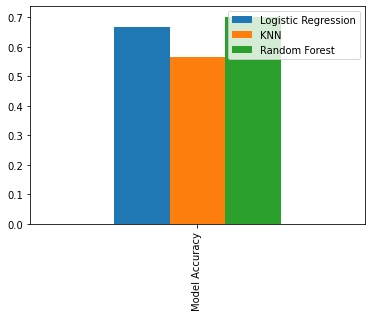

In [199]:
|model_compare = pd.DataFrame(model_scores, index=["Model Accuracy"])
model_compare.plot.bar();


Now we've got a  model running and Let's look at tuning methods, We would want to better our KNN model which showed **78%** accuracy.

In [200]:
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [201]:
train_scores

[0.9991511035653651,
 0.7780135823429541,
 0.7729202037351444,
 0.715195246179966,
 0.7058573853989814,
 0.683786078098472,
 0.6880305602716469,
 0.6706281833616299,
 0.6752971137521222,
 0.6604414261460102,
 0.6642614601018676,
 0.6502546689303905,
 0.6464346349745331,
 0.6443123938879457,
 0.6519524617996605,
 0.6383701188455009,
 0.6421901528013583,
 0.6320033955857386,
 0.6383701188455009,
 0.6307300509337861]

In [202]:
test_scores

[0.5457627118644067,
 0.5813559322033899,
 0.5745762711864407,
 0.5542372881355933,
 0.5644067796610169,
 0.5627118644067797,
 0.5440677966101695,
 0.5491525423728814,
 0.5576271186440678,
 0.5542372881355933,
 0.5677966101694916,
 0.5525423728813559,
 0.5644067796610169,
 0.5559322033898305,
 0.5644067796610169,
 0.5525423728813559,
 0.5711864406779661,
 0.5576271186440678,
 0.5627118644067797,
 0.5542372881355933]

The Maximum KNN score on our test data: 58.14%


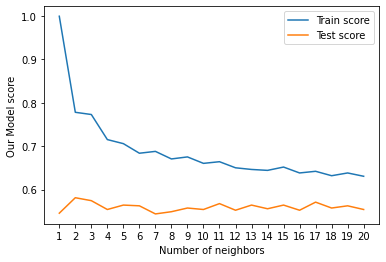

In [203]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Our Model score")
plt.legend()

print(f"The Maximum KNN score on our test data: {max(test_scores)*100:.2f}%")

If we pay attention to out test score which is in orange line, the highest value is about in 2(number of neighbors). The default is 5 [KNN_Neighbors_Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). we just did some hyperparameter tuning to better our KNN
 and the result improved from **56%** to **58.14%**. 

We're going to tune:
**LogisticRegression()** which got the second highest score. In order to acheive that we are going to get hyperparameter grids setup for our  scored model and tune it using [RandomizedSearchCV](https://www.programcreek.com/python/example/91146/sklearn.model_selection.RandomizedSearchCV) and [Tuning _LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). There's few hyperparameter we can tune, And we chose C from the documentation. 


In [204]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


 
# Setup random hyperparameter search for LogisticRegression
randomSearch_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=10,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
randomSearch_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [205]:
# Find the best hyperparameters
randomSearch_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [206]:
randomSearch_log_reg.score(X_test, y_test)

0.711864406779661

In the above step, We have applied our LogisticRegression model to the same data and evaluated its score. And We have got an improvement here. Our LogisticRegression model was **66%** before and after tuning it's increased to **71%**

In [207]:
model_scores

{'KNN': 0.5644067796610169,
 'Logistic Regression': 0.6677966101694915,
 'Random Forest': 0.7016949152542373}

We are not impressed by the results of Our KNN model which stil has not shown much improvement.The function we used [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and we are going to try hyperparameter tuning RandomizedSearchCV

In [214]:
rf_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
pprint(rf_grid)

{'bootstrap': [True],
 'max_depth': [80, 90, 100, 110],
 'max_features': [2, 3],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [8, 10, 12],
 'n_estimators': [100, 200, 300, 1000]}


In [236]:
rf = RandomForestClassifier()
# Setup random seed
np.random.seed(42)
# Random search of parameters, using 3(CV) to search across 100 different combinations.
rf_model = RandomizedSearchCV(estimator = rf, 
                              param_distributions = rf_grid, 
                              n_iter = 100, 
                              cv = 3, 
                              verbose=2, 
                              random_state=42, 
                              n_jobs = -1)
# Fit the random search model
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, 100, None],
                                         'min_samples_leaf': [1, 2, 4]},
                                        {'bootstrap': [True, False],
                                         'max_depth': [10, 100, None],
                                         'min_samples_split': [2, 10]}],
                   random_state=42, verbose=2)

In [237]:
# Fit random hyperparameter 
rf_model.best_params_

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2}

In [257]:
# we will Evaluate the randomized search RandomForest model
rf_model.score(X_test, y_test)

0.7135593220338983

### By just tuning the hyperparameters for RandomForest model we have seen a slight boost from **70%** to **71%**

Let's try to do the same with **`LogisticRegression Model`**



In [239]:
logistic_regress_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# Setup random seed
np.random.seed(42)

# hyperparameter search for LogisticRegression
rs_logistic_regress = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=logistic_regress_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_logistic_regress.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [240]:
rs_logistic_regress.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [241]:
rs_logistic_regress.score(X_test, y_test)

0.7101694915254237

We can tune it using GridSearchCv too

In [299]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [297]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [296]:
gs_log_reg.score(X_test, y_test)

0.7101694915254237

The above score using gridsearchCv is same as when we use RandomSearchCv for LogicticRegressionModel

# By just tuning the hyperparameters for LogisticRegression model we have seen a slight boost from **66%** to **71%**

In [274]:
# # Create a hyperparameter grid for RandomForestRegressor
# rf_grid = {"n_estimators": np.arange(10, 1000, 50),
#            "max_depth": [None, 3, 5, 10],
#            "min_samples_split": np.arange(2, 20, 2),
#            "min_samples_leaf": np.arange(1, 20, 2)}

# # Setup grid hyperparameter search for LogisticRegression
# gs_rf = GridSearchCV(RandomForestRegressor(),
#                           param_grid=rf_grid,
#                           cv=5,
#                           verbose=True)

# # Fit grid hyperparameter search model
# gs_rf.fit(X_train, y_train);

# ## This takes too long...


#**Evaluating our tuned ML models**

# We will evaluate our ML models using the below metrics:


1.   ROC curve and AUC score 
2.   Confusion matrix 
3.   Classification report





To check and visualize the performance of our model, we will use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) [AUC-ROC-curve](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/) curve evaluation metrics for checking performance. We will try to evaluate how our model is performing by comparing the true positive rate to the false positive rate using plot_roc_curve from Scikit-Learn which can help us create a ROC curve as well as calculate the (AUC) metric.

In [294]:
#ROC curve and AUC score
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [295]:
y_test

565     1
1220    1
1677    0
1577    0
2833    0
       ..
1255    1
2560    0
2935    0
1412    1
685     1
Name: Fire, Length: 590, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


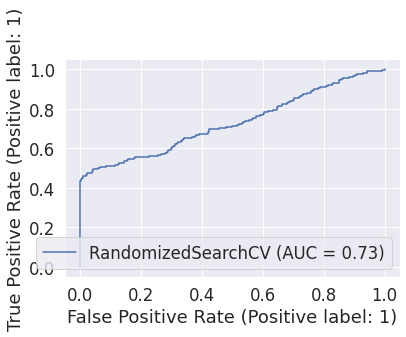

In [292]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_logistic_regress, X_test, y_test);

In [282]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[269  23]
 [148 150]]


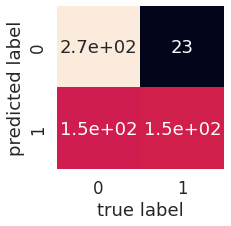

In [291]:
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
  plt.xlabel("true label")
  plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

there are 23 occasaions where the model predicted 0 when it should've been 1 (false negative). [Confusion_Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In order To make comparisons and evaluate our trained model, we will look at confusion matrix


In [ ]:
|